# Splitting method example

In [1]:
import sys
sys.path.append('..')
from parameters import *
from functions import *

X0 = [3, 3]
PDEProb = 1.1993935091850245e-13

### Timestep and stages

In [2]:
# Timestep
dt =T/1000

# Stages configuration
R_in = np.sqrt(X0[0]**2 + X0[1]**2)
R_f = R
m = 11
R_list = np.linspace(R_in,R_f,m)

### Splitting method

Checking dimensionality of H, Ns and Y.
Radiuses: [4.243 3.918 3.594 3.27  2.946 2.621 2.297 1.973 1.649 1.324 1.   ]
Walks per stage: [40. 25. 25. 25. 25. 25. 25. 25. 25. 25.]
Timestep: 0.001


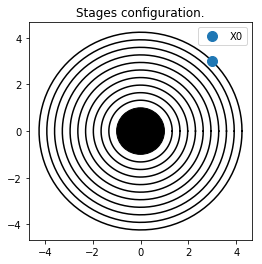


Splitting method starts...



Estimated variance: 1.9729608598521565e-13
The estimated probability is: 1.0747904e-12 (using MC)
Confidence interval: [ 1.0747904e-12 +- 3.866932228217403e-13 ]	with P = 95%

PDE result is:  1.1993935091850245e-13


In [3]:
# Walks per stage
N_list = np.ones(m-1) * 25
N_list[0] = 40
# Initialize H and Y
H = np.zeros(R_list.shape[0]-1) # Hits
Y = np.zeros(int(N_list[0])) # Hits of the well for each root
# Call the splitting method
Y_SM, H_SM = SplittingMethod(X0, 0., dt, N_list, R_list, Y, H, 0, np.nan, seed = SEED)
# Compute the results
print('\n\n')
if H_SM is not np.nan:
    mean_SM, std = ComputeEstimatesSplittingMethod(Y_SM, N_list, PDEProb = PDEProb)

### Splitting method with balanced growth

Splitting method with balanced growth.

Radiuses: [4.243 3.918 3.594 3.27  2.946 2.621 2.297 1.973 1.649 1.324 1.   ]
Timestep: 0.001


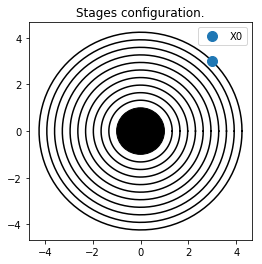


Pilot run with walks per stage:  [40. 25. 25. 25. 25. 25. 25. 25. 25. 25.]
Pilot run starts...
Pilot run terminated.
Pilot run results: 
	H = [  4.   8.  21.  38.  63.  96. 116. 133. 155. 164.]
	p_i = [0.1   0.08  0.105 0.072 0.066 0.061 0.048 0.046 0.047 0.042] 
	N = [10 13 10 14 16 17 21 22 22 24]

Changing the values multiplying by 2.
New N = [20 26 20 28 32 34 42 44 44 48].

Calling the splitting method.



Estimated variance: 1.793649970602389e-14
The estimated probability is: 8.895626468827624e-14 (using MC)
Confidence interval: [ 8.895626468827624e-14 +- 3.5154893432520093e-14 ]	with P = 95%

PDE result is:  1.1993935091850245e-13


In [4]:
# Define the walks per stage of the pilot run
N_list = np.ones(m-1) * 25
N_list[0] = 40
# Call the splitting method with balanced growth
Y_SM, H_SM, N_SM = SplittingMethodBalancedGrowth(X0, dt, R_list, N_list, multiplier = 2, seed = SEED)
# Compute the results
print('\n\n')
if H_SM is not np.nan:
    mean_SM_BG, std = ComputeEstimatesSplittingMethod(Y_SM, N_SM, PDEProb)

### Error comparison (wrt PDE)
Note: we are assuming that the PDE represents the true probability

In [5]:
print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)
print('Splitting method (balanced growth) relative error: ', np.abs(PDEProb - mean_SM_BG)/PDEProb)

Splitting method (basic version) relative error:    7.9611156953009425
Splitting method (balanced growth) relative error:  0.2583229439959109
